# Spring 2025 ENVECON/IAS 118 - Introductory Applied Econometrics Problem Set 1
## Due on Gradescope, Midnight February 7


# Submission Instructions 

1. Complete the problem set using the template below. Make sure to save your work as you go! 
2. When you are done, export your submission as a PDF. Make sure that all of your code and your output (figures, calculations, etc) are included in your final submission to receive full credit (run all of your cells!).
3. To export as a PDF, go to the file dropdown menu and select the ”Save and export notebook as” dropdown menu. In this menu make sure to select ”PDF”, "Webpdf" or "PDF via Chrome" (if that option appears instead). 
4. Upload your completed submission to Gradescope: https://www.gradescope.com/courses/927499.

Note: You can also complete this problem set using R studio directly. If so, use R Markdown to create a PDF for your submission. Your submission must include all code and output in order to receive full credit.

-----------------------------------------

As you see in Figure 1, there appears to be some association between GDP per capita and fertilizer use in Agriculture.

<p style="text-align: center;"> Figure 1. </p>
<img src="ag_graph.png" width="600" />

The data are from the World Bank development indicators (http://data.worldbank.org/data-catalog/world-development-indicators) for 2021, except for Eritrea and South Sudan. 
Fertilizer use is measured as the consumption of fertilizer on arable land (land used for cultivation or for pasture). It is measured in tons per hectare of arable land. GDP per capita is gross domestic product divided by midyear population, and is also measured in US $ \$ $. 
Figure 1 above includes all 189 countries from the original dataset, for which we have GDP per capita and fertilizer use. 

We only include some (randomly) selected countries for the assignment. The values for selected countries can be found in the csv files "countriesA_fertilizer.csv" and "countriesB_fertilizer.csv". We will use both datasets. 

In [22]:
#get rid of scientific display of numbers
options(scipen = 100, digits = 4)

# Exercise 1. Relationship between GDP per capita and Fertilizer Use 
We will estimate a simple linear relationship  between Fertilizer use and per capita GDP on a subset of 5 countries.

(a) Use R to create a scatter plot of these observations. 

a-Step 1: Load the .csv file called countriesA_fertilizer.csv. (Hint: the `read.csv()` command will likely be helpful.)

In [23]:
df<-read.csv("countriesA_fertilizer.csv")

a-Step 2: Look at the data. This dataset only has 5 rows so you can just call the entire dataset. In general you want to use the `head()` command so that R does not print the entire dataset which will take way too many pages.

In [24]:
head(df)

,countryname,gdp,fert
,<chr>,<dbl>,<dbl>
1,Australia,60697.2,82.620
2,Czechia,26822.5,148.624
3,France,43671.3,153.324
4,Afghanistan,355.8,5.203
5,Lao PDR,2535.6,50.892


a-Step 3: Rename the variables to "countryname", "gdp_pc", and "fert_use". (Hint: the `colnames()` command may be useful. Also remember that to select multiple values (such as mulitple variable names, you can use R's vector notation `c()`. For example: `c("a", "b", "c")`.

In [25]:
colnames(df) <- c("countryname","gdp_pc","fert_use")
head(df)


,countryname,gdp_pc,fert_use
,<chr>,<dbl>,<dbl>
1,Australia,60697.2,82.620
2,Czechia,26822.5,148.624
3,France,43671.3,153.324
4,Afghanistan,355.8,5.203
5,Lao PDR,2535.6,50.892


a-Step 4: Create a scatterplot of the data. Make sure to (1) label the axes and their
units, and (2) title your graph. (Hint: the `plot()` command will likely come in handy. Use `help(plot)` or `?plot` to view the documentation for the function and how to include labels.)

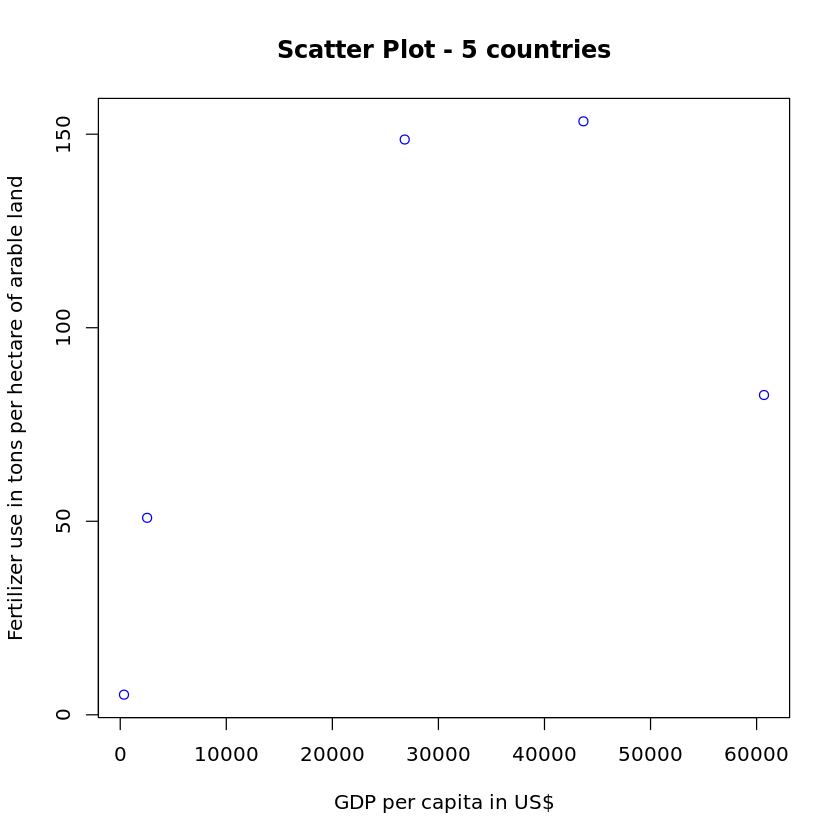

In [26]:
plot(df$gdp_pc, df$fert_use, col = "blue",
     main="Scatter Plot - 5 countries",
        xlab="GDP per capita in US$",
        ylab="Fertilizer use in tons per hectare of arable land")


b) Estimate the linear relationship between GDP per capita and Fertilizer consumption ("F") by OLS, showing all intermediate calculations.

$$\widehat{F} = \hat{\beta}_0 + \hat{\beta}_1GDPcap$$

For this exercise,  **DO NOT** use the built-in R commands like `cov()` or `lm()`. Use basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to reproduce all the values from table and show all the steps.

b-Step 1: Create new data objects called  __mean_gdp_pc__ and __mean_fert_use__ equal to the mean of __gdp_pc__ and __fert_use__.

In [27]:
#if between () will display output
(mean_gdp_pc<-mean(df$gdp_pc))
#and
(mean_fert_use<-mean(df$fert_use))
#first is mean gdp_pc then mean fert_used


[1] 26816

[1] 88.13

b-Step 2: Calculate the covariance (only using the mathematical operations specified above) between gdp_pc and fert_use: $cov(gdp_{pc},fert_{use})$. 

- Do this by first creating two new columns of residuals: __resgdp__, a column that subtracts the __mean_gdp_pc__ from __gdp_pc__ and __resft__ that subtracts the __mean_fert_use__ from __fert_use__. 
- Next create a column __resgdpft__ which is equal to __resft__ multiplied by __resgdp__.
- Finally, generate a value named `covarA` which is equal to the sum of __resgdpft__ divided by n-1.
- Make sure to call `covarA` at the end so we can see it printed in the output.

Hint: To add new columns to your dataset, you can either use mutate as in Small Assignment 1 or you can use the following syntax: 
`dataset_name$new_var_name <- formula for the new variable`. Another option is to use cbind (as explained here: https://www.statology.org/r-add-a-column-to-dataframe/)

In [28]:
df$resgdp<-df$gdp_pc-mean_gdp_pc
df$resft<-df$fert_use-mean_fert_use
df$resgdpft<-df$resgdp*df$resft
head(df)

covarA<-sum(df$resgdpft)/(5-1)
covarA

,countryname,gdp_pc,fert_use,resgdp,resft,resgdpft
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,60697.2,82.620,33880.75,-5.513,-186769.1
2,Czechia,26822.5,148.624,6.02,60.492,364.2
3,France,43671.3,153.324,16854.81,65.191,1098784.8
4,Afghanistan,355.8,5.203,-26460.72,-82.930,2194384.7
5,Lao PDR,2535.6,50.892,-24280.87,-37.241,904233.0


[1] 1002749

b-Step 3: Calculate the variance. 
- First generate a column __sqresgdp__ equal to the square of __resgdp__. 
- Generate a value named `varA` which is equal to the sum of __sqresgdp__ divided by n-1. 
- Make sure to call `varA` at the end so we can see it printed in the output.

In [29]:
df$sqresgdp<-df$resgdp*df$resgdp
varA<-sum(df$sqresgdp)/(5-1)
varA


[1] 680430075

b-Step 4: Using the quantities generated above, generate and print `beta_1hat` and `beta_0hat`, your estimates for $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [30]:
(beta_1hat<-covarA/varA)
(beta_0hat<-mean_fert_use-beta_1hat*mean_gdp_pc)

[1] 0.001474

[1] 48.61

c) Interpret the value of the estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$

The predicted fertilizer use for a country with zero GDP_pc is 48.613 tons per hectare of arable land, holding all else constant. Increasing GDP_pc by 1 dollar increases predicted fertilizer use by 0.00147 tons per hectare of arable land, holding all else constant.

d) In your data frame, compute the fitted value and the residual (the difference between the actual and fitted value) for each observation. Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Create a new column named "fitted" and another new column called "residuals". Call the head() of your dataset so we can see these new columns. Verify that the residuals sum to 0 (approximately).

In [31]:
df$fitted<-beta_0hat+beta_1hat*df$gdp_pc
df$residuals<-df$fert_use-df$fitted
head(df[c("countryname","fitted", "residuals")])
sum(df$residuals)

,countryname,fitted,residuals
,<chr>,<dbl>,<dbl>
1,Australia,138.06,-55.443
2,Czechia,88.14,60.483
3,France,112.97,40.352
4,Afghanistan,49.14,-43.935
5,Lao PDR,52.35,-1.458


[1] 0.00000000000002842

e) Now use the `lm()` command to run this regression automatically rather than manually as you did above and save the output as "reg1". 

Check that your estimates of $\hat{\beta_0}$ and $\hat{\beta_1}$ that you calculated manually above match the estimates using `lm()`. 
Call the `summary()` of reg1 so we can see the output.

In [32]:
reg1<-lm(fert_use~gdp_pc,df)
summary(reg1)


Call:
lm(formula = fert_use ~ gdp_pc, data = df)

Residuals:
     1      2      3      4      5 
-55.44  60.48  40.35 -43.93  -1.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 48.61303   39.90853    1.22     0.31
gdp_pc       0.00147    0.00112    1.31     0.28

Residual standard error: 58.6 on 3 degrees of freedom
Multiple R-squared:  0.365,	Adjusted R-squared:  0.153 
F-statistic: 1.72 on 1 and 3 DF,  p-value: 0.281


f) According to the estimated relationship, what is the predicted $\widehat{F}$ for a country with a GDP per capita of \$13,000?



In [33]:
(hatF<-48.613028+0.001474*13000)


[1] 67.78

$\widehat{F}$ is 67.775028 

g) How much of the variation in fertilizer use for the 5 selected countries is explained by their GDP per capita?

Calculate the $R^2$ by calculating the sum of squared model residuals and the sum of squared total (variation of the dependent variable). Use only basic mathematical commands (`+`, `-`, `*`, `\`, `sum()`, `^`) to do this. Then calculate $R^2$ and make sure to call the value so we can see it printed out.

In [34]:
SSR<-sum(df$residuals*df$residuals)
SST<-sum(df$resft*df$resft)
Rsquared<-1-(SSR/SST)

Rsquared

[1] 0.3648

h) Repeat exercises (a) and (e) for the additional set of countries whose data is available in the file countriesB_fertilizer.csv.
*Note:* We outline how you might fill out the code in separate cells. If needed, click on "Insert" in the menu to add additional cells below, or simply click "b" on your keyboard while not in edit mode to add a cell below. Click "d" twice while not in edit mode to delete a cell, or go to "Edit"->"Delete Cells".

,countryname,gdp_pc,fert_use
,<chr>,<dbl>,<dbl>
1,Switzerland,93446.4,177.187
2,Gabon,8635.8,28.250
3,"Egypt, Arab Rep.",3886.7,542.574
4,Eritrea,566.7,3.002
5,Senegal,1630.7,8.839
6,Mozambique,504.0,12.257


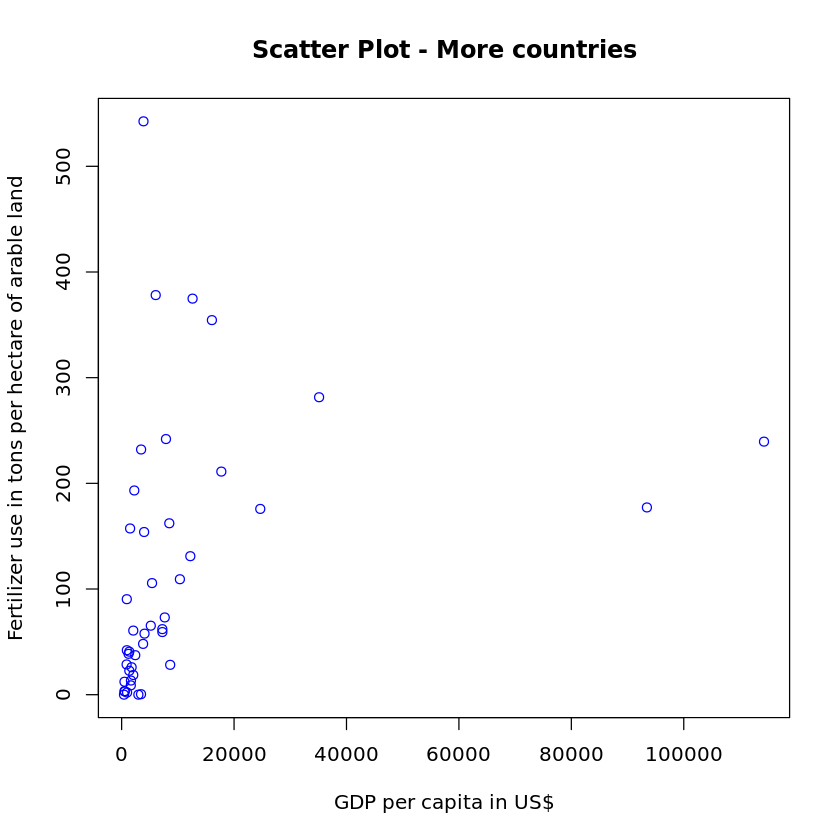

In [35]:
# (a) Steps 1-4 - do not print the whole sample when using the head() command
dfB<-read.csv("countriesB_fertilizer.csv")

colnames(dfB) <- c("countryname","gdp_pc","fert_use")
head(dfB)

plot(dfB$gdp_pc, dfB$fert_use, col = "blue",
     main="Scatter Plot - More countries",
        xlab="GDP per capita in US$",
        ylab="Fertilizer use in tons per hectare of arable land")


In [36]:
# (e) use the lm()
reg2<-lm(fert_use~gdp_pc,dfB)
summary(reg2)


Call:
lm(formula = fert_use ~ gdp_pc, data = dfB)

Residuals:
   Min     1Q Median     3Q    Max 
-102.6  -82.5  -49.1   50.0  438.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.911889  20.074604    4.83 0.000019 ***
gdp_pc       0.001774   0.000838    2.12     0.04 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120 on 42 degrees of freedom
Multiple R-squared:  0.0964,	Adjusted R-squared:  0.0748 
F-statistic: 4.48 on 1 and 42 DF,  p-value: 0.0403


i) How do your estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ change between the two sets of countries? Discuss and briefly explain this variation in 2-3 sentences.

Our estimated $\hat{\beta}_1$ is pretty stable between dataset 1 (where we estimated $\hat{\beta}_1 = 0.00147$) and dataset 2 (where we estimated $\hat{\beta}_1= 0.00177$), potentially reflecting the fact that the relationship between GDP per capita and fertilizer use is relatively stable across countries. However, our estimated $\hat{\beta}_0$ changes significantly from sample to sample, ranging from $\hat{\beta}_0 = 48.61303$ in dataset 1 to $\hat{\beta}_0 = 96.911889$ in dataset 2, reflecting the fact that the average fertilizer use differs significantly from sample to sample.

 # Exercise 2. Functional Forms
 Suppose you estimate an alternative specification given below for sample B countries, where log() refers to the natural log, ln().

 


$$\widehat{F} = \hat{\alpha}_0 + \hat{\alpha}_1 log(GDPcap)$$

Let $$ \hat{\alpha}_0=-315.6$$ and $$\hat{\alpha}_1 = 52.3 .$$
a. Please give at least one reason discussed in lecture/section why we might log GDPcap in our regression model?


If the relationship between y and x is non-linear. In particular, a level-log model is useful when the underlying relationship between x and y follows a logarithmic relationship.

b. What is the predicted quantity of fertilizer used for a country with a GDP per capita of 10,00 US$?

In [37]:

#(optional) for question 2

dfB$logG<-log(dfB$gdp_pc)
reg3<-lm(fert_use~logG,dfB)
summary(reg3)

#predict
-315+52.3*log(10000)



Call:
lm(formula = fert_use ~ logG, data = dfB)

Residuals:
   Min     1Q Median     3Q    Max 
-130.1  -61.5  -25.7   20.3  425.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -315.6      102.3   -3.09  0.00358 ** 
logG            52.3       12.3    4.26  0.00011 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 106 on 42 degrees of freedom
Multiple R-squared:  0.302,	Adjusted R-squared:  0.286 
F-statistic: 18.2 on 1 and 42 DF,  p-value: 0.000111


[1] 166.7

The predicted fertilizer use for a country with a GDP per capita of 10,000US$ is 166.7 tons per hectare of arable land, holding all else constant

c. How would you interpret the marginal effect of GDPcap on Fertilizer use based on your estimated model ($\hat{\alpha}_1 = 52.3$), being careful to take the functional form of your model into account?

_Hint: Look at Section 1_

Since this is a logarithmic model (Level-Log), our estimated model indicates that a 1 **percent** increase in GDP per capita is associated with a $52.3/100 = 0.523$ **tons** increase in fertilizer use per hectare of arable land.